# Model Training and Evaluation

This notebook performs training and evaluation of multiple regression models to predict Air Quality Index (AQI) values. The workflow includes:

1. **Data Loading and Preprocessing**: Importing libraries, loading datasets, and preparing data for modeling.
2. **Linear Regression**: Training and evaluating a Linear Regression model.
3. **Random Forest Regression**: Training and evaluating a Random Forest Regressor.
4. **Decision Tree Regression**: Training and evaluating a Decision Tree Regressor.
5. **Support Vector Machine (SVM)**: Training and evaluating an SVM Regressor.
6. **Performance Metrics and Visualization**: Calculating metrics like MSE, RMSE, R² and plotting actual vs. predicted AQI values.

In [84]:
## importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


## models, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
## loading the data

X_train = pd.read_csv('../data/X_train_balanced.csv')
y_train = pd.read_csv('../data/y_train_balanced.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_test = pd.read_csv('../data/y_test.csv')
X_train.head()

,OZONE_MAX,Lattitude,Longitude,PM10,PM2.5,SO2,NO2,CO,CO2,Temperature
0,8.0,18.515570,73.824393,14.5,13.0,2.0,22.0,77.0,415.0,32.50000
1,55.0,18.482239,73.858092,30.0,19.0,11.0,30.0,33.5,0.0,29.41539
2,52.0,18.482239,73.858092,21.0,17.0,6.5,50.5,40.5,23.0,28.50000
3,14.0,18.451716,73.856170,24.5,19.5,5.5,104.0,115.0,14.5,33.50000
4,0.0,18.451716,73.856170,12.0,9.0,8.0,94.0,74.5,0.0,26.50000


In [3]:
## converting to numpy arrays

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

y_train = y_train.ravel()
y_test = y_test.ravel()

In [4]:
## shape of the data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(93807, 10)
(93807,)
(30962, 10)
(30962,)


## __Linear Regression__

In [39]:
## training Linear Regression

lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
## predicting on the test set

y_pred = lr_regressor.predict(X_test)

In [74]:
## calculating the metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

lr_mse = mse
lr_rmse = rmse
lr_r2 = r2 * 100
lr_mae = mae

print('Mean Absolute Error:     ', mae)
print('Mean Squared Error:      ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2 * 100)

Mean Absolute Error:      25.76984042528531
Mean Squared Error:       1051.7740184185886
Root Mean Squared Error:  32.43106563803583
R2 Score:                 75.7185992828703


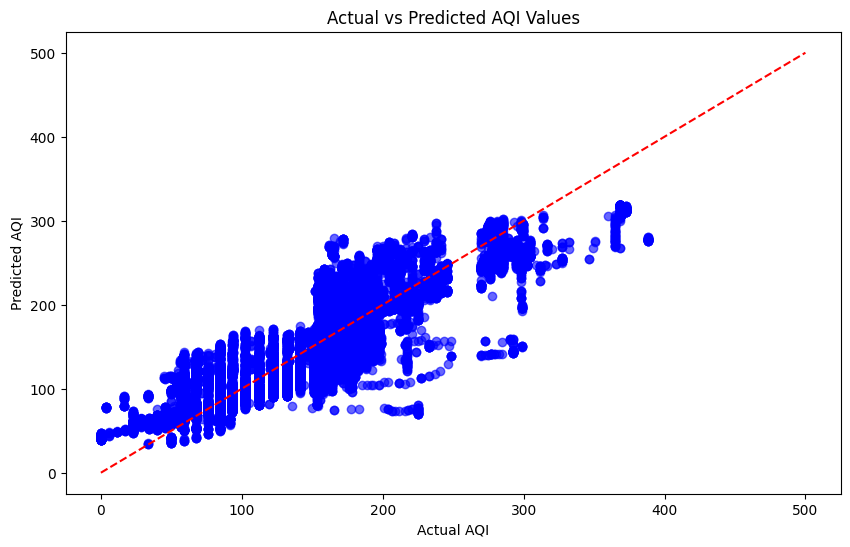

In [43]:
## plotting a scatter plot of predicted vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 500], [0, 500], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI Values")
plt.show()

## __Random Forest Regression__

In [44]:
## training Random Forest Regressor

rf_regressor = RandomForestRegressor(n_estimators=8, random_state=42)
rf_regressor.fit(X_train[0:3500], y_train[0:3500])

RandomForestRegressor(n_estimators=8, random_state=42)

In [75]:
y_pred = rf_regressor.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

rf_mse = mse
rf_rmse = rmse
rf_r2 = r2 * 100
rf_mae = mae

print('Mean Absolute Error:     ', mae)
print('Mean Squared Error:      ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2 * 100)

Mean Absolute Error:      2.7302090262279326
Mean Squared Error:       52.813481783507626
Root Mean Squared Error:  7.267288475319225
R2 Score:                 98.78074064200565


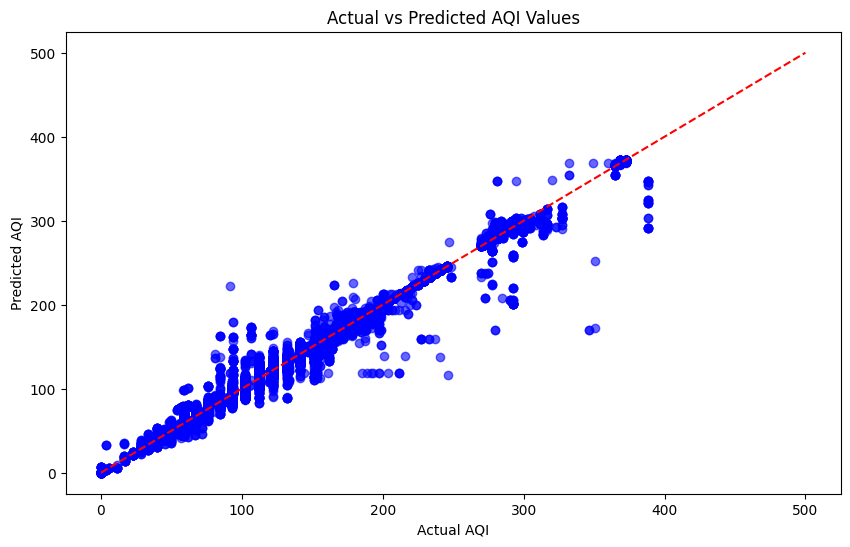

In [47]:
## plotting a scatter plot of predicted vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 500], [0, 500], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI Values")
plt.show()

## __Decision Tree Regression__

In [53]:
## training Decision Tree Regressor

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train[0:3500], y_train[0:3500])

DecisionTreeRegressor(random_state=42)

In [67]:
y_pred = dt_regressor.predict(X_test)

In [68]:
## calculating the metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

dt_mse = mse
dt_rmse = rmse
dt_r2 = r2 * 100
dt_mae = mae

print('Mean Absolute Error:     ', mae)
print('Mean Squared Error:      ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2 * 100)

Mean Absolute Error:      2.1224151008848615
Mean Squared Error:       44.0303743047357
Root Mean Squared Error:  6.635538735079142
R2 Score:                 98.98350867819877


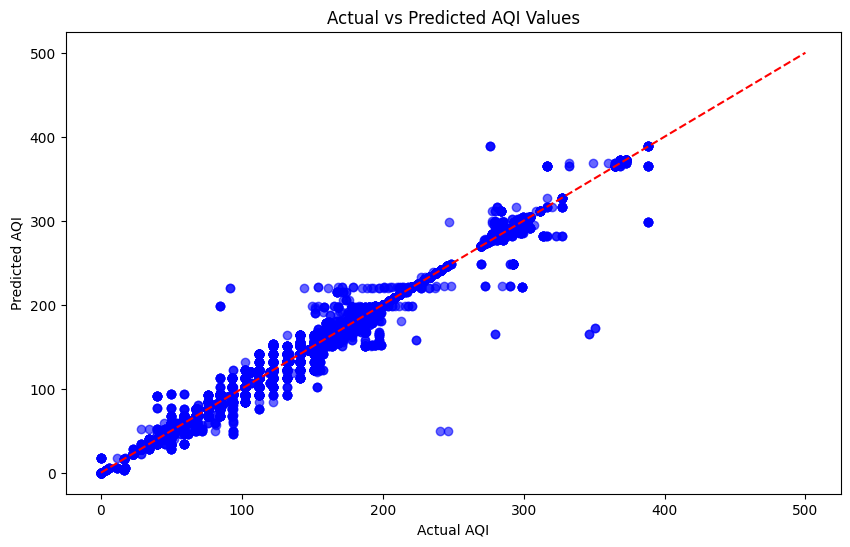

In [51]:
## plotting a scatter plot of predicted vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 500], [0, 500], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI Values")
plt.show()

## __Support Vector Machine__

In [22]:
## training Support Vector Regressor

svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train[0:70000], y_train[0:70000])

SVR()

In [77]:
## predicting on the test set

y_pred = svr_regressor.predict(X_test[0:1000])

In [78]:
## calculating the metrics

mse = mean_squared_error(y_test[0:1000], y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test[0:1000], y_pred)
mae = mean_absolute_error(y_test[0:1000], y_pred)

print('Mean Absolute Error:     ', mae)
print('Mean Squared Error:      ', mse)
print('Root Mean Squared Error: ', rmse)
print('R2 Score:                ', r2 * 100)

Mean Absolute Error:      20.358706376779057
Mean Squared Error:       835.9563400584155
Root Mean Squared Error:  28.91290957441702
R2 Score:                 82.74050692136979


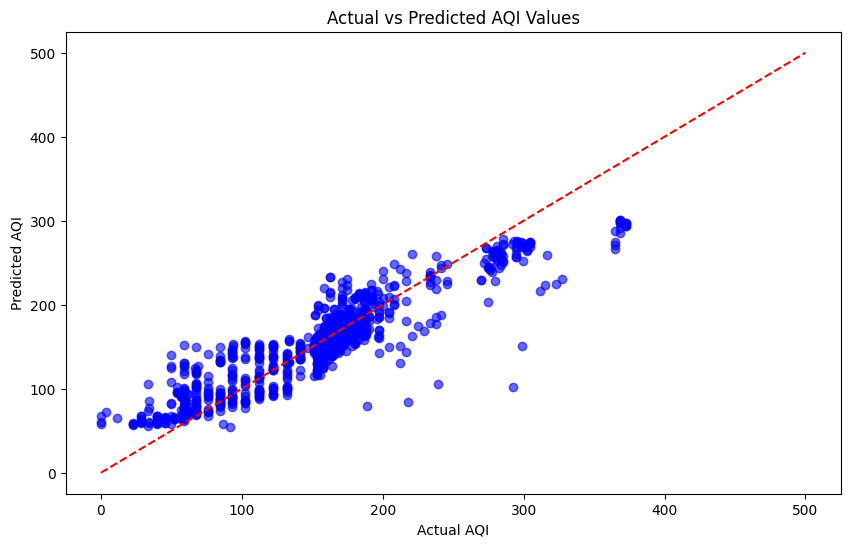

In [61]:
## plotting a scatter plot of predicted vs actual values

plt.figure(figsize=(10, 6))
plt.scatter(y_test[0:1000], y_pred, alpha=0.6, color='blue')
plt.plot([0, 500], [0, 500], color='red', linestyle='--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI Values")
plt.show()

In [79]:
## dataframe of summary of metrics

metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'Support Vector'],
    'Mean Absolute Error': [lr_mae, rf_mae, dt_mae, mae],
    'Mean Squared Error': [lr_mse, rf_mse, dt_mse, mse],
    'Root Mean Squared Error': [lr_rmse, rf_rmse, dt_rmse, rmse],
    'R2 Score': [lr_r2, rf_r2, dt_r2, r2*100]
})
metrics

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,Linear Regression,25.769840,1051.774018,32.431066,75.718599
1,Random Forest,2.730209,52.813482,7.267288,98.780741
2,Decision Tree,2.122415,44.030374,6.635539,98.983509
3,Support Vector,20.358706,835.956340,28.912910,82.740507


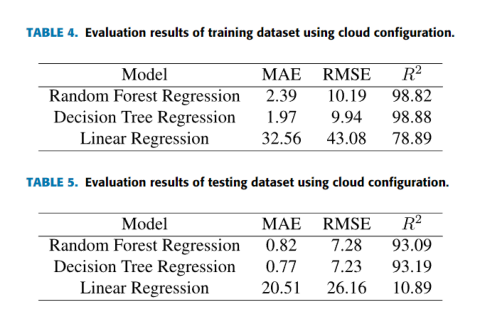

In [88]:
## reference results from the paper

img = Image.open('../paper_results.png')
plt.figure(figsize=(6, 8))
plt.axis('off')
plt.imshow(img)